## Data scraping using beautiflul soup
- import beautiflul soup
- make a get request to fetch page data
- parse html
- filter relvant parts

### instalation
- pip install bs4
- i worked with colab that's why i hadn't need to install it

## make a get request to fetch page data

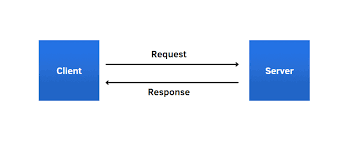

We are in a machine which is client and we want to access some data in the internet.So, we are going to make a get request to the server (with a particular url) and return what we get as an html response.Go to inspect --> network to see how this work also --> element to see html page of your page

In [ ]:
from urllib.request import urlopen   # for get request

In [ ]:
android_url="https://en.wikipedia.org/wiki/Android_version_history"     # example of an url

the get request is a http request and what we receive is a http response, his response is like a package that contains everything needed to display the web page in your browser. The HTTP response includes the HTML code for the web page

In [ ]:
android_data=urlopen(android_url)   #send and receive a http requset with opening a connection with the browser
# android_data.close()              don't close the connection with the server before reading it
print(type(android_data))

<class 'http.client.HTTPResponse'>


In [ ]:
android_html=android_data.read()    #read the html part
android_data.close()                #closing the connection
android_html

## Parsing data

we mean the process of analyzing the HTML code and extracting meaningful information from it. HTML is a markup language used to structure the content of a web page, but on its own, it may be difficult to work with or extract specific data from.

In [ ]:
from bs4 import BeautifulSoup as soup     # beautiful soup is a class help us to understand the structure of a html page and extract meaningful data

In [ ]:
android_soup=soup(android_html,'html.parser')     # you create an object and you tell soup what kind of tyoe json,html...
print(type(android_soup))

In [ ]:
print(android_soup)    # now you can see how better is this, they give us another structure that we can undertand

In [ ]:
android_soup.h1

to find all heading, we use findAll

In [ ]:
android_soup.findAll('h1',{})    # why {}, you will now later

so, it gives us a list. In this example, we have one heading

Now, let's say we want to extract information from the first table in our page

In [ ]:
tables=android_soup.findAll('table',{'class':'wikitable'})

In [ ]:
len(tables)

34

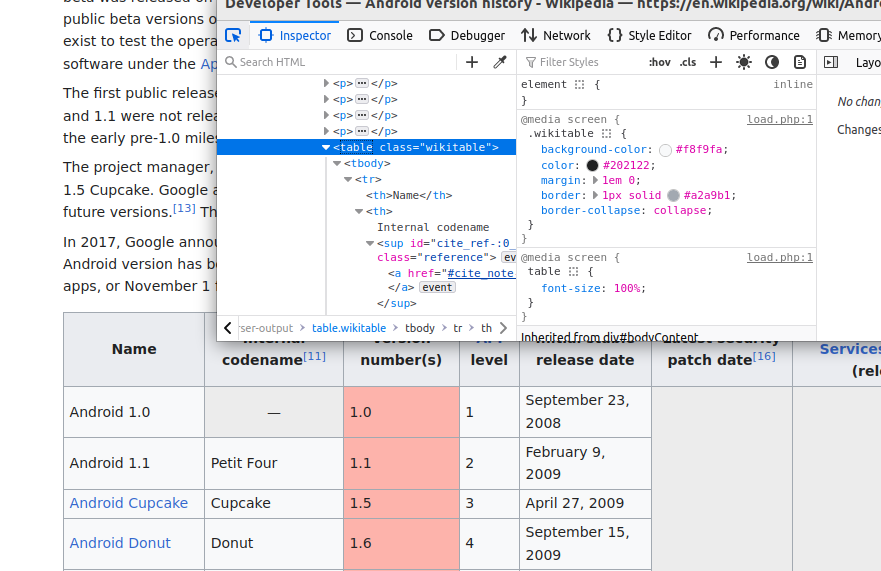

In [ ]:
#how to get html correspand to the first table
android_table=tables[0]
print(android_table)    # we get the html of our table

## Extracting useful information
- we are going to extract data from the html that we scrap it
 - remove undesired tags
 - Extract table header and data


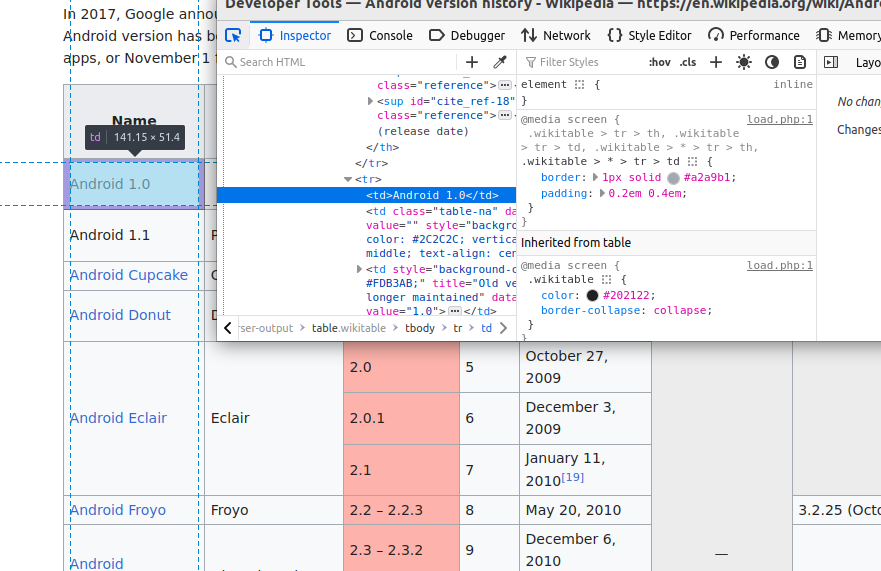

we have th for table header and tr for table data

In [ ]:
headers=android_table.findAll('th')
headers

In [ ]:
len(headers)

In [ ]:
(headers[0],headers[0].text)

In [ ]:
#how to get columns
column_titles=[ct.text[:-1] for ct in headers]       #to delete \n
column_titles

In [ ]:
#how to rows
rows_data=android_table.findAll('tr')[1:]
rows_data

In [ ]:
first_row=rows_data[0].findAll('td')
for d in first_row:
  print(d.text[:-1])

In [ ]:
second_row=rows_data[1].findAll('td')
for d in second_row:
  print(d.text[:-1])

In [ ]:
last_row=rows_data[-1].findAll('td')
for d in last_row:
  print(d.text[:-1])

In [ ]:
# delete this row because we don't need it
rows_data=rows_data[:-1]

In [ ]:
last_row=rows_data[-1].findAll('td')
for d in last_row:
  print(d.text[:-1])

In [ ]:
len(rows_data)

In [ ]:
r5_row=rows_data[5].findAll('td')
for d in r5_row:
  print(d.text[:-1])

we can see that some rows doesn't have name and etc, what we are going to do is to delete them

In [ ]:
new_rows_data=[]
for idx,row in enumerate(rows_data):
  if idx not in [5,6,9,11,12,14,16,17,21,19,24,26]:
    new_rows_data.append(row)

In [ ]:
table_rows=[]
for row in new_rows_data:
  current_row=[]
  row_data=row.findAll('td')[0:5]    #delete last two columns
  for data in row_data:
    current_row.append(data.text[:-1])
  table_rows.append(current_row)


In [ ]:
table_rows

In [ ]:
column_titles=column_titles[:-2]

## Writing and reading csv files

we have a problem that in row of index 2 and 4 ",", and that cause problem when converting our data to csv file

In [ ]:
for row in table_rows:
  for idx,data in enumerate(row):
    if idx in [2,4]:
      row[idx]=data.split(",")[0]

In [ ]:
filename="android_version_history.csv"
with open(filename,'w') as f:
    headers=",".join(column_titles)
    headers+="\n"
    f.write(headers)
    for row in table_rows:
      row_csv=""
      row_csv=",".join(row)
      row_csv+="\n"
      f.write(row_csv)

In [ ]:
table_rows

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/android_version_history.csv')

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.iloc[0][0]

## Loading local file

you can also instead of making a request to the server, use the html file the page and directry soup it

In [ ]:
file="/content/Android version history - Wikipedia.html"

In [ ]:
with open(file,'r') as f:
  page_soup=soup(f,'html.parser')

In [ ]:
page_soup.h1